<a href="https://colab.research.google.com/github/amalhooti/X-ray/blob/main/Amal_AI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
train_dir = '/content/drive/MyDrive/AI Assignment/train'
test_dir = '/content/drive/MyDrive/AI Assignment/test'

In [7]:
import os
print(len(os.listdir('/content/drive/MyDrive/AI Assignment/train/NORMAL')))
print(len(os.listdir('/content/drive/MyDrive/AI Assignment/train/PNEUMONIA')))
print(len(os.listdir('/content/drive/MyDrive/AI Assignment/test/NORMAL')))
print(len(os.listdir('/content/drive/MyDrive/AI Assignment/test/PNEUMONIA')))

1341
3885
234
390


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 4181 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [9]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [30]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 967s 7s/step - accuracy: 0.9582 - loss: 0.1196 - val_accuracy: 0.9512 - val_loss: 0.1444
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 800s 6s/step - accuracy: 0.9758 - loss: 0.0744 - val_accuracy: 0.9541 - val_loss: 0.1159
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 817s 6s/step - accuracy: 0.9810 - loss: 0.0551 - val_accuracy: 0.9579 - val_loss: 0.1106
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 830s 6s/step - accuracy: 0.9789 - loss: 0.0627 - val_accuracy: 0.9579 - val_loss: 0.1074
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 794s 6s/step - accuracy: 0.9833 - loss: 0.0483 - val_accuracy: 0.9636 - val_loss: 0.1123


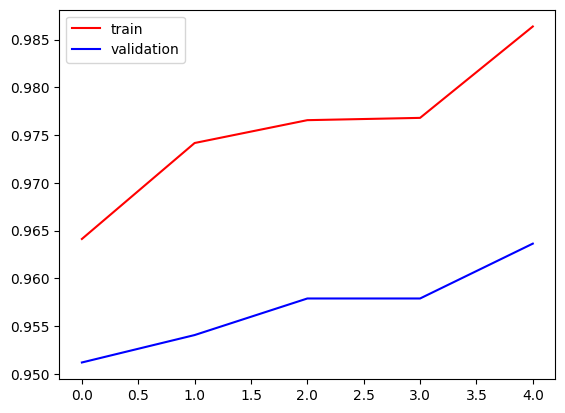

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

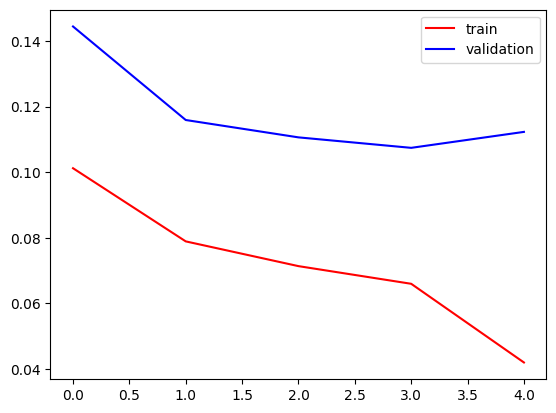

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [17]:
predictions = model.predict(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 24 210]
 [ 55 335]]
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.10      0.15       234
           1       0.61      0.86      0.72       390

    accuracy                           0.58       624
   macro avg       0.46      0.48      0.43       624
weighted avg       0.50      0.58      0.51       624



In [31]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [20]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1204s 9s/step - accuracy: 0.8533 - loss: 2.1901 - val_accuracy: 0.7435 - val_loss: 16.5957
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1212s 9s/step - accuracy: 0.9370 - loss: 0.1636 - val_accuracy: 0.7435 - val_loss: 11.0673
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1251s 10s/step - accuracy: 0.9331 - loss: 0.2109 - val_accuracy: 0.7474 - val_loss: 7.1946
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1204s 9s/step - accuracy: 0.9639 - loss: 0.1022 - val_accuracy: 0.9321 - val_loss: 0.1390
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1243s 9s/step - accuracy: 0.9467 - loss: 0.1331 - val_accuracy: 0.9550 - val_loss: 0.0986


In [23]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [24]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[232   2]
 [385   5]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.38      0.99      0.55       234
           1       0.71      0.01      0.03       390

    accuracy                           0.38       624
   macro avg       0.55      0.50      0.29       624
weighted avg       0.59      0.38      0.22       624



In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history = resnet_model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1437s 11s/step - accuracy: 0.7707 - loss: 0.4752 - val_accuracy: 0.8574 - val_loss: 0.3094
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1480s 11s/step - accuracy: 0.8331 - loss: 0.3678 - val_accuracy: 0.8756 - val_loss: 0.2623
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1481s 11s/step - accuracy: 0.8803 - loss: 0.2849 - val_accuracy: 0.8632 - val_loss: 0.3253
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1480s 11s/step - accuracy: 0.9060 - loss: 0.2289 - val_accuracy: 0.7933 - val_loss: 0.4207
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1517s 11s/step - accuracy: 0.8498 - loss: 0.3518 - val_accuracy: 0.8957 - val_loss: 0.2533


In [33]:
predictions = resnet_model.predict(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 178s 9s/step


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 74 160]
 [102 288]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.42      0.32      0.36       234
           1       0.64      0.74      0.69       390

    accuracy                           0.58       624
   macro avg       0.53      0.53      0.52       624
weighted avg       0.56      0.58      0.56       624

